In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
from sklearn.preprocessing import LabelEncoder
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [4]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,cohen_kappa_score


# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# For boosting
from sklearn.ensemble import AdaBoostClassifier

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [5]:
# Reading the dataset
import pandas as pd
import numpy as np
tracks=pd.read_csv('tracks.csv', encoding='latin')
print('Shape before deleting duplicate values:', tracks.shape)

# Removing duplicate rows if any
tracks=tracks.drop_duplicates()
print('Shape After deleting duplicate values:', tracks.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
tracks.head(10)

Shape before deleting duplicate values: (586672, 20)
Shape After deleting duplicate values: (586672, 20)


id                                  name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                 Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  CapÃ­tulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc    Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45         El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                   Lady of the Evening           0   
5  0BRXJHRNGQ3W4v9frnSfhu                             Ave Maria           0   
6  0Dd9ImXtAtGwsmsAD69KZT                        La Butte Rouge           0   
7  0IA0Hju8CAgYfV1hwhidBH                               La Java           0   
8  0IgI1UCz84pYeVetnl1lGP                    Old Fashioned Girl           0   
9  0JV4iqw2lSKJaHBQZ0e5zK        MartÃ­n Fierro - Remasterizado           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   
5       178933         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   
6       134467         0    ['Francis Marty']  ['2nuMRGzeJ5jJEKlfS7rZ0W']   
7       161427         0      ['Mistinguett']  ['4AxgXfD7ISvJSTObqm4aIE']   
8       310073         0      ['Greg Fieler']  ['5nWlsH5RDgFuRAiDeOFVmf']   
9       181173         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   
5         1922         0.227  0.2610    5   -12.343     1       0.0382   
6         1922         0.510  0.3550    4   -12.833     1       0.1240   
7         1922         0.563  0.1840    4   -13.757     1       0.0512   
8         1922         0.488  0.4750    0   -16.222     0       0.0399   
9   1922-03-29         0.548  0.0391    6   -23.228     1       0.1530   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674          0.744000    0.1510   0.1270  104.851               3  
1         0.797          0.000000    0.1480   0.6550  102.009               1  
2         0.994          0.021800    0.2120   0.4570  130.418               5  
3         0.995          0.918000    0.1040   0.3970  169.980               3  
4         0.989          0.130000    0.3110   0.1960  103.220               4  
5         0.994          0.247000    0.0977   0.0539  118.891               4  
6         0.965          0.000000    0.1550   0.7270   85.754               5  
7         0.993          0.000016    0.3250   0.6540  133.088               3  
8         0.620          0.006450    0.1070   0.5440  139.952               4  
9         0.996          0.933000    0.1480   0.6120   75.595               3

In [6]:
artists=pd.read_csv('artists.csv', encoding='latin')
artists.head(10)

id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   
5  0DotfDlYMGqkbzfBhcA5r6        7.0     []   
6  0DqP3bOCiC48L8SM9gK4W8        1.0     []   
7  0Drs3maQb99iRglyTuxizI        0.0     []   
8  0DsPeAi1gxPPnYjgpiEGSR        0.0     []   
9  0DtvnTxgZ9K5YaPS5jdlQW       20.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                 à¸à¸¹à¸à¸² à¸ à¸²à¸§à¸´à¸à¸µ           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0  
5                                   Astral Affect           0  
6                                       Yung Seed           0  
7                                           Wi'Ma           0  
8                                         lentboy           0  
9                                        addworks           0

In [7]:
print(tracks.shape,artists.shape)

(586672, 20) (1162095, 5)


duration m: The length of the track in milliseconds, 

key - The track's predicted overall key. Using the common Pitch Class notation, integers correspond to pitches. For instance, 0 = C, 1 = C/D, 2, and so on. Value -1 is returned if no key was found.


mode - The mode of a track, or the type of scale from which its melodic content is formed, specifies whether it is in major or minor. Minor is denoted by 0, while major is represented by 1.

time signature: A track's predicted overall time signature. A notational method used to indicate how many beats there are in each bar is called the time signature (metre) (or measure).

acousticness - An indicator of the track's acousticness, ranging from 0.0 to 1.0, is called acousticness. 1.0 denotes a high degree of assurance that the track is acoustic. The values for this characteristic are distributed as follows: Sound intensity distribution

danceability - Based on a variety of musical criteria, such as tempo, rhythm stability, beat strength, and general regularity, danceability explains how appropriate a track is for dancing. The least danceable value is 0.0, and the most danceable value is 1.0. The values for this characteristic are distributed as follows: Distribution of dancing skill

energy: An indicator of perceived intensity and activity, energy ranges from 0.0 to 1.0. In general, frenetic music feels quick, loud, and boisterous.

instrumentalness -predicts whether a track is entirely instrumental or has voices. Sounds like "ooh" and "aah" are regarded as instrumental in this situation. Tracks that are spoken word or rap are obviously vocal. The likelihood that a track is vocal-free increases as the instrumentalness value approaches 1.0. The intent is for values above 0.5 to represent instrumental tracks, but confidence increases as the value gets closer to 1.0. The values for this characteristic are distributed as follows: Distribution of instrumentality

liveness - Indicates whether there is an audience present during the recording. Greater liveness numbers indicate a higher likelihood that the song was performed live. A score greater than 0.8 indicates a high probability that the music is live. The values for this characteristic are distributed as follows: Distribution of liveness

loudness - loudness is a measure of how loud a track is overall in decibels (dB). In order to compare the relative loudness of tracks, loudness ratings are averaged over the entire track. The main acoustic characteristic that correlates psychologically with physical strength is loudness (amplitude). Typical values are between -60 and 0 db. The values for this characteristic are distributed as follows: Distribution of loudness

Speechiness is the ability to identify spoken words in a track. The attribute value will be closer to 1.0 the more exclusively speech-like the recording is (such as a talk show, audio book, or piece of poetry). Tracks that are most likely formed entirely of spoken words have values above 0.66. Tracks that may include both music and speech, either in portions or layered, are described by values between 0.33 and 0.66, encompassing situations like rap music. Values less than 0.33 most likely refer to tracks that are not speech-like, like music. The values for this characteristic are distributed as follows: Spreading out the babbling

Valence- A scale from 0.0 to 1.0 used to describe the musical positivity that a track conveys. Those with a high valence sound happier, cheerier, and more euphoric, whilst tracks with a low valence sound more melancholy.
tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this: Tempo distribution

id - The Spotify ID for the track.

type - The object type: “audio_features”

popularity - The track's level of popularity. The range of the value will be 0 to 100, with 100 being the most common figure. The popularity is determined by an algorithm and primarily depends on how recently and how many times the track has been played overall. In general, songs that are played often currently will be more popular than songs that were frequently performed in the past. The mathematical relationship between track popularity and artist and album popularity. Because the value is not updated in real time, the popularity value may lag behind actual popularity by a few days.

In [8]:
tracks['id_artists'] = [i[2:-2] for i in tracks['id_artists']]
tracks['release_year'] = [int(i.split('-')[0]) for i in tracks['release_date']]

In [9]:
tracks = tracks[tracks['release_year']>=2008]
tracks = tracks[tracks['speechiness']<0.66]
##above 0.66 are tracks with only spoken words, not music

In [10]:
artists.rename(columns = {'id': 'id_artists','popularity': 'artists_popularity'}, inplace = True)
artists.drop(['genres','name'],axis = 1, inplace = True)

In [11]:
tracks_df = tracks.merge(artists, on = 'id_artists')
tracks_df.head(10)

id                                               name  \
0  6catF1lDhNTjjGa2GxRQNN      You'll Never Walk Alone - Mono; 2002 Remaster   
1  4aSw1QJIMwYSoDEgzgdCJL       Ferry Cross the Mersey - Mono; 2002 Remaster   
2  0ZMMtH875IR2TfkyC4PolD   Don't Let the Sun Catch You Crying (Main) - Mono   
3  7LfvdUcwrrMKVh8WPGXnbA                           How Do You Do It? - Mono   
4  25qyOLQyX7bsceW3UL55BW                                  Hello Little Girl   
5  4LDaBsMVANIqGcD4rOjaUT  Don't Let the Sun Catch You Crying - 2008 Rema...   
6  1dZ8WUAsipdyBLUQklxhT5     Ferry Cross the Mersey - Stereo; 2002 Remaster   
7  7HMeul83qsxs8oK1Q5vRaG                                   I Like It (Main)   
8  1hangrBJi1Tshxcm7r5Tgt                      I'll Be There - First Version   
9  3j60Gwb3quixJNGZgRWZ3a     The End of the Rainbow - Stereo; 2008 Remaster   

   popularity  duration_ms  explicit                     artists  \
0          56       160187         0  ['Gerry & The Pacemakers']   
1          40       141987         0  ['Gerry & The Pacemakers']   
2          34       157093         0  ['Gerry & The Pacemakers']   
3          29       114987         0  ['Gerry & The Pacemakers']   
4          25       115240         0  ['Gerry & The Pacemakers']   
5          23       158800         0  ['Gerry & The Pacemakers']   
6          23       144200         0  ['Gerry & The Pacemakers']   
7          22       135867         0  ['Gerry & The Pacemakers']   
8          22       197560         0  ['Gerry & The Pacemakers']   
9          22       134173         0  ['Gerry & The Pacemakers']   

               id_artists release_date  danceability  energy  ...  \
0  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.484   0.265  ...   
1  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.405   0.365  ...   
2  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.477   0.352  ...   
3  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.617   0.711  ...   
4  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.409   0.639  ...   
5  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.459   0.344  ...   
6  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.399   0.296  ...   
7  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.550   0.552  ...   
8  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.609   0.290  ...   
9  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.600   0.374  ...   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0322         0.394          0.000000    0.1490    0.285  113.564   
1       0.0289         0.255          0.000005    0.1630    0.588  104.536   
2       0.0300         0.406          0.000000    0.1220    0.478  106.773   
3       0.0297         0.360          0.000002    0.0841    0.963  142.266   
4       0.0302         0.288          0.000000    0.3430    0.928  145.903   
5       0.0301         0.764          0.000594    0.1110    0.487  106.479   
6       0.0294         0.500          0.000000    0.0719    0.658  107.098   
7       0.0344         0.330          0.000000    0.0907    0.964  147.715   
8       0.0342         0.696          0.000027    0.1080    0.487  122.434   
9       0.0264         0.773          0.000169    0.1120    0.556   95.023   

   time_signature  release_year  followers  artists_popularity  
0               3          2008   175360.0                  55  
1               4          2008   175360.0                  55  
2               4          2008   175360.0                  55  
3               4          2008   175360.0                  55  
4               4          2008   175360.0                  55  
5               4          2008   175360.0                  55  
6               4          2008   175360.0                  55  
7               4          2008   175360.0                  55  
8               4          2008   175360.0                  55  
9               3          2008   175360.0                  55  

[10 rows x 23 columns]

In [12]:
tracks_df.shape

(102433, 23)

<AxesSubplot:>

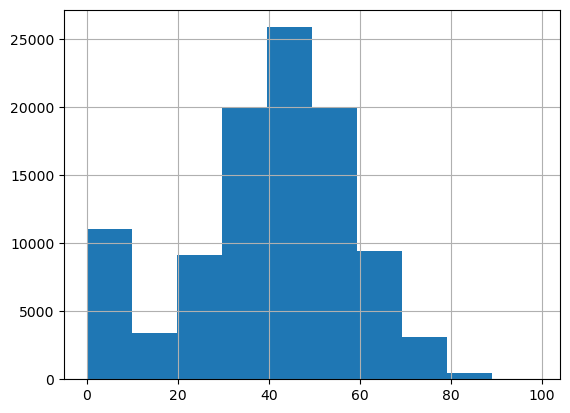

In [13]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
tracks_df['popularity'].hist()

In [14]:
#Basic Data Exploration
# Looking at sample rows in the data
tracks_df.head()

id                                              name  \
0  6catF1lDhNTjjGa2GxRQNN     You'll Never Walk Alone - Mono; 2002 Remaster   
1  4aSw1QJIMwYSoDEgzgdCJL      Ferry Cross the Mersey - Mono; 2002 Remaster   
2  0ZMMtH875IR2TfkyC4PolD  Don't Let the Sun Catch You Crying (Main) - Mono   
3  7LfvdUcwrrMKVh8WPGXnbA                          How Do You Do It? - Mono   
4  25qyOLQyX7bsceW3UL55BW                                 Hello Little Girl   

   popularity  duration_ms  explicit                     artists  \
0          56       160187         0  ['Gerry & The Pacemakers']   
1          40       141987         0  ['Gerry & The Pacemakers']   
2          34       157093         0  ['Gerry & The Pacemakers']   
3          29       114987         0  ['Gerry & The Pacemakers']   
4          25       115240         0  ['Gerry & The Pacemakers']   

               id_artists release_date  danceability  energy  ...  \
0  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.484   0.265  ...   
1  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.405   0.365  ...   
2  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.477   0.352  ...   
3  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.617   0.711  ...   
4  3UmBeGyNwr4iDWi1vTxWi8   2008-02-11         0.409   0.639  ...   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0322         0.394          0.000000    0.1490    0.285  113.564   
1       0.0289         0.255          0.000005    0.1630    0.588  104.536   
2       0.0300         0.406          0.000000    0.1220    0.478  106.773   
3       0.0297         0.360          0.000002    0.0841    0.963  142.266   
4       0.0302         0.288          0.000000    0.3430    0.928  145.903   

   time_signature  release_year  followers  artists_popularity  
0               3          2008   175360.0                  55  
1               4          2008   175360.0                  55  
2               4          2008   175360.0                  55  
3               4          2008   175360.0                  55  
4               4          2008   175360.0                  55  

[5 rows x 23 columns]

In [15]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102433 entries, 0 to 102432
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  102433 non-null  object 
 1   name                102433 non-null  object 
 2   popularity          102433 non-null  int64  
 3   duration_ms         102433 non-null  int64  
 4   explicit            102433 non-null  int64  
 5   artists             102433 non-null  object 
 6   id_artists          102433 non-null  object 
 7   release_date        102433 non-null  object 
 8   danceability        102433 non-null  float64
 9   energy              102433 non-null  float64
 10  key                 102433 non-null  int64  
 11  loudness            102433 non-null  float64
 12  mode                102433 non-null  int64  
 13  speechiness         102433 non-null  float64
 14  acousticness        102433 non-null  float64
 15  instrumentalness    102433 non-nul

In [16]:
# Looking at the descriptive statistics of the data
tracks_df.describe(include='all').T

count  unique                     top  freq  \
id                    102433  102433  6catF1lDhNTjjGa2GxRQNN     1   
name                  102433   85691               Year 3000    63   
popularity          102433.0     NaN                     NaN   NaN   
duration_ms         102433.0     NaN                     NaN   NaN   
explicit            102433.0     NaN                     NaN   NaN   
artists               102433   25826        ['Taylor Swift']   325   
id_artists            102433   25982  06HL4z0CvFAxyc27GXpf02   325   
release_date          102433    4704              2009-01-01  1782   
danceability        102433.0     NaN                     NaN   NaN   
energy              102433.0     NaN                     NaN   NaN   
key                 102433.0     NaN                     NaN   NaN   
loudness            102433.0     NaN                     NaN   NaN   
mode                102433.0     NaN                     NaN   NaN   
speechiness         102433.0     NaN                     NaN   NaN   
acousticness        102433.0     NaN                     NaN   NaN   
instrumentalness    102433.0     NaN                     NaN   NaN   
liveness            102433.0     NaN                     NaN   NaN   
valence             102433.0     NaN                     NaN   NaN   
tempo               102433.0     NaN                     NaN   NaN   
time_signature      102433.0     NaN                     NaN   NaN   
release_year        102433.0     NaN                     NaN   NaN   
followers           102433.0     NaN                     NaN   NaN   
artists_popularity  102433.0     NaN                     NaN   NaN   

                              mean             std     min       25%  \
id                             NaN             NaN     NaN       NaN   
name                           NaN             NaN     NaN       NaN   
popularity                40.04643        18.58119     0.0      31.0   
duration_ms          230335.672303   118218.840919  6360.0  189413.0   
explicit                  0.099851        0.299802     0.0       0.0   
artists                        NaN             NaN     NaN       NaN   
id_artists                     NaN             NaN     NaN       NaN   
release_date                   NaN             NaN     NaN       NaN   
danceability              0.604068        0.155008     0.0     0.504   
energy                    0.650104        0.217551     0.0     0.507   
key                       5.318208         3.57211     0.0       2.0   
loudness                  -7.22521        3.641221 -50.174    -8.585   
mode                      0.618775         0.48569     0.0       0.0   
speechiness                0.08149         0.08633     0.0    0.0338   
acousticness              0.299006        0.294928     0.0     0.037   
instrumentalness          0.071609        0.219458     0.0       0.0   
liveness                  0.200381        0.174287     0.0    0.0968   
valence                   0.522598        0.249565     0.0     0.322   
tempo                   122.473478       28.911693     0.0     99.83   
time_signature            3.931536        0.356042     0.0       4.0   
release_year           2014.093661        3.895487  2008.0    2011.0   
followers           2003914.864995  6544383.751301     0.0   23254.0   
artists_popularity       55.167983       18.492019     0.0      43.0   

                         50%       75%         max  
id                       NaN       NaN         NaN  
name                     NaN       NaN         NaN  
popularity              42.0      53.0        99.0  
duration_ms         220160.0  256360.0   4995083.0  
explicit                 0.0       0.0         1.0  
artists                  NaN       NaN         NaN  
id_artists               NaN       NaN         NaN  
release_date             NaN       NaN         NaN  
danceability           0.612     0.716       0.985  
energy                 0.677     0.826         1.0  
key                      5.0  

In [17]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
tracks_df.nunique()

id                    102433
name                   85691
popularity               100
duration_ms            49792
explicit                   2
artists                25826
id_artists             25982
release_date            4704
danceability             978
energy                  1698
key                       12
loudness               15697
mode                       2
speechiness             1313
acousticness            4534
instrumentalness        5352
liveness                1718
valence                 1662
tempo                  45616
time_signature             5
release_year              14
followers              21402
artists_popularity        99
dtype: int64

In [18]:
#Visualize distribution of all the Categorical Predictor variables in the data using bar plots

tracks_df.groupby('key').size()

key
0     12191
1      9134
2     10324
3      3302
4      8399
5      8135
6      7147
7     11801
8      6276
9     10760
10     6340
11     8624
dtype: int64

In [19]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

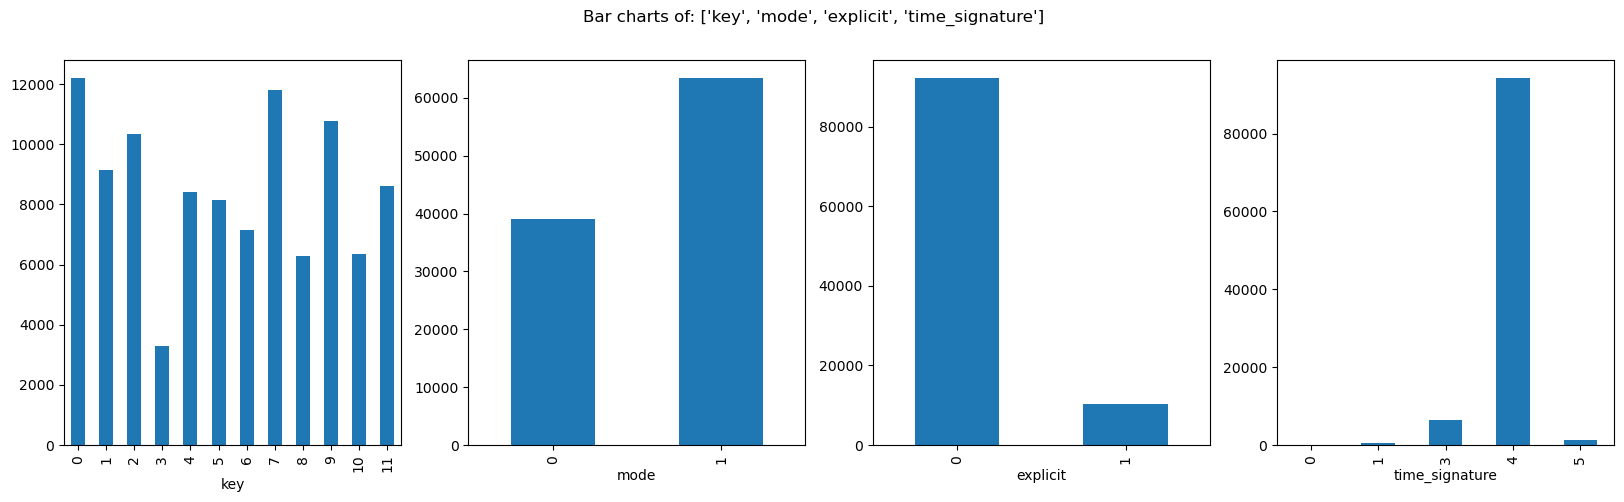

In [20]:
# Calling the function
PlotBarCharts(inpData=tracks_df, colsToPlot=['key', 'mode', 'explicit', 
                                                 'time_signature'])

In [21]:
#Bar Charts Interpretation
#These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
#In the ideal bar chart each category has comparable frequency.
#Hence, there are enough rows for each category in the data for the ML algorithm to learn.

#If there is a column which shows too skewed distribution where there is 
#only one dominant bar and the other categories are present in very low numbers. 
#These kind of columns may not be very helpful in machine learning. 
#We confirm this in the correlation analysis section and take a final call to select or reject the column.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()

Text(0.5, 1.0, 'Hisogram plot')

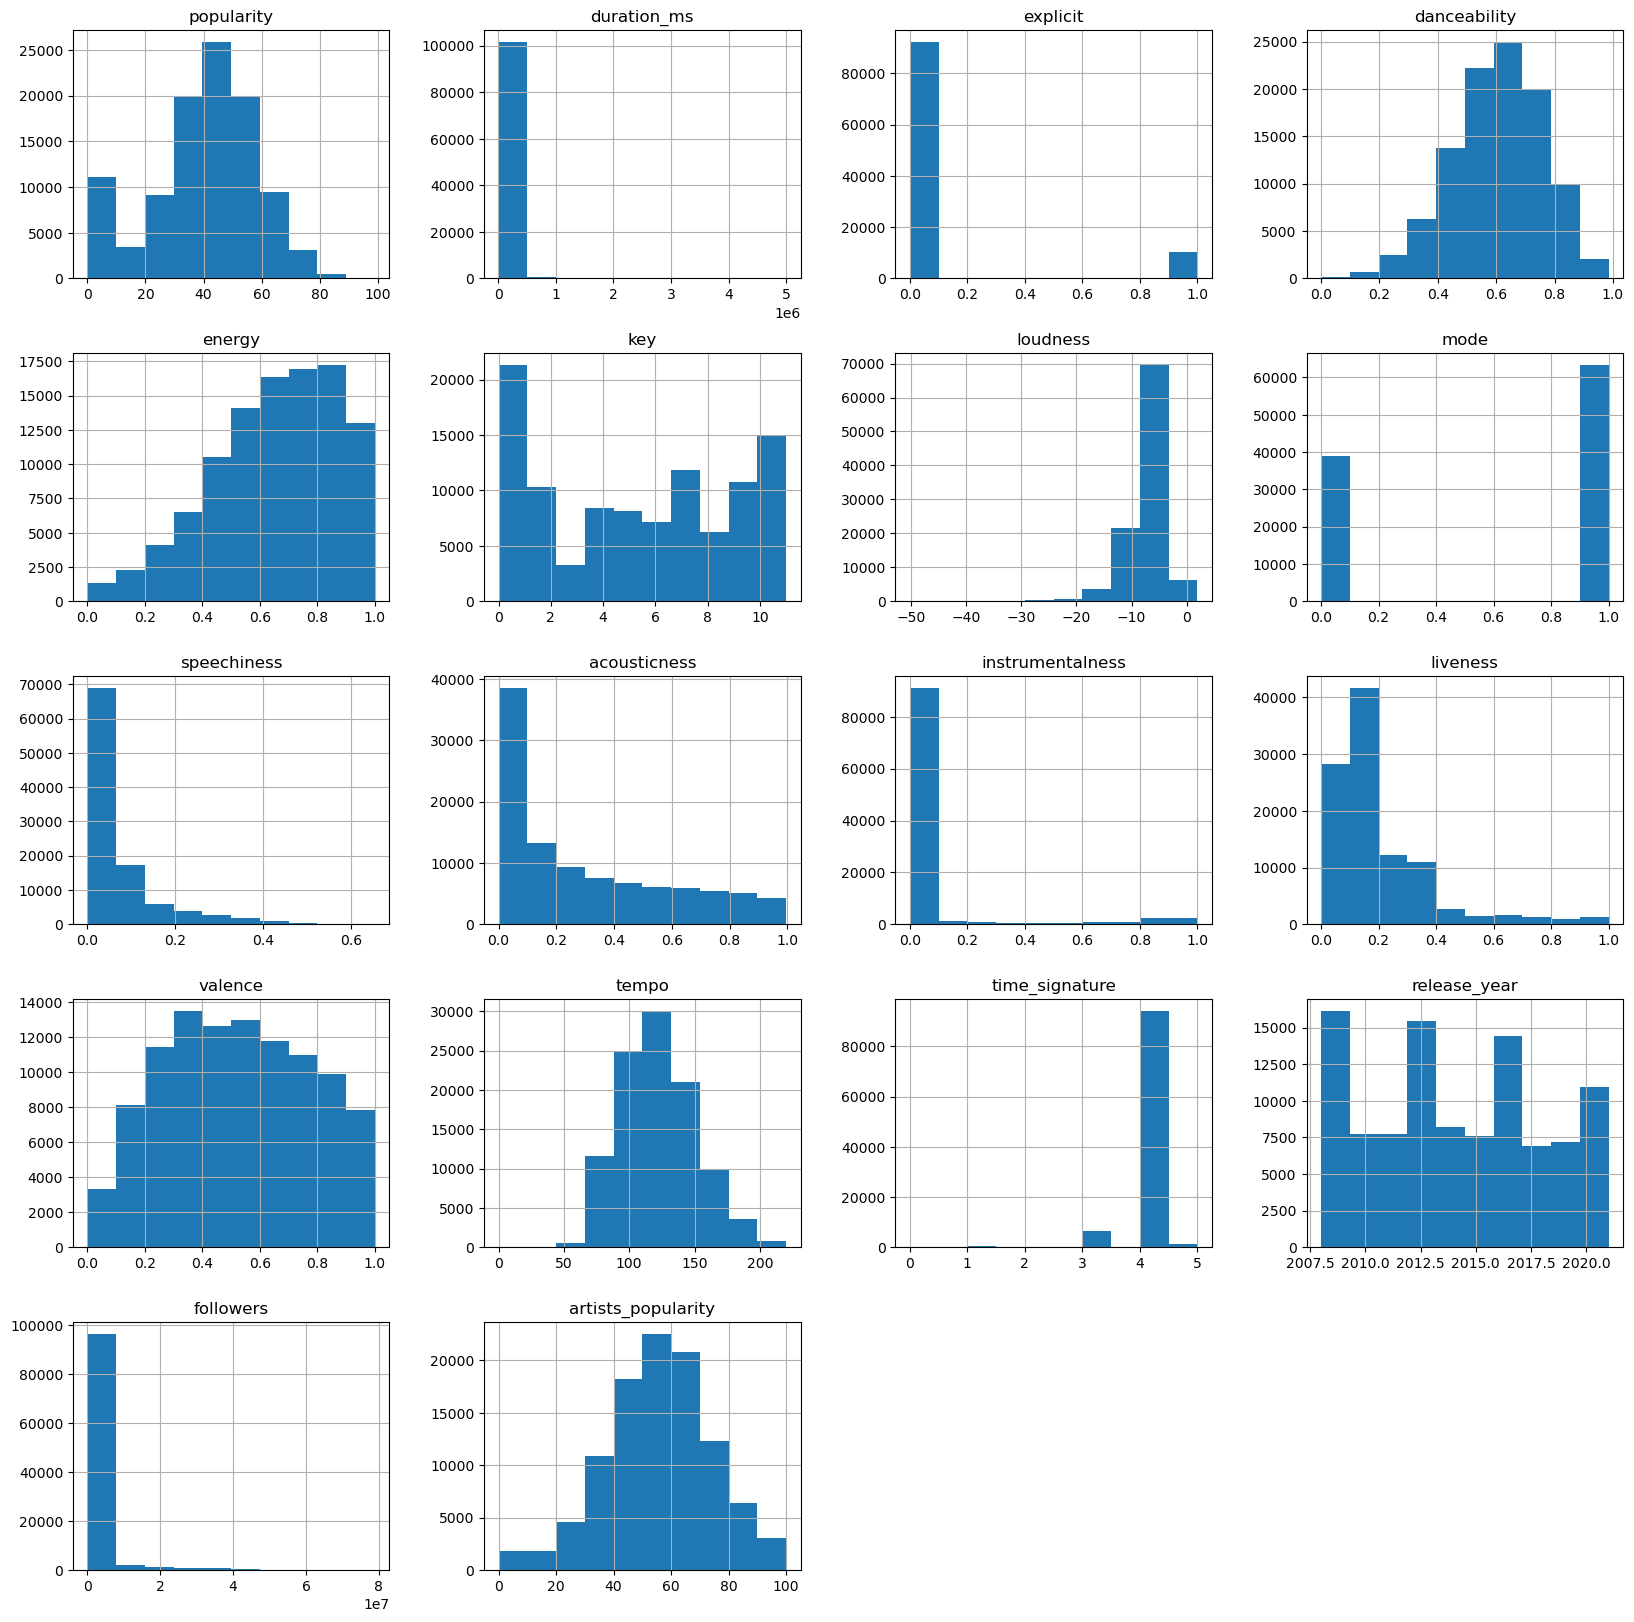

In [23]:
#Visualize distribution of all the Continuous Predictor variables in the data using histograms

# Plotting histograms of multiple columns together
tracks_df.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')

#Histogram Interpretation
#Histograms shows us the data distribution for a single continuous variable.
#The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.




duration_ms ---->   Right-skewed
explicit    ---->   discrete
danceability ---->  no skew (Symmetric Dist.)
energy ---->        Left Skewed
key ---->           no skew
loudness ---->      Left Skewed
mode ---->          Discrete
speechiness ---->   Right-skewed
acousticness ---->  Right-skewed
instrumentalness -->Right-skewed
liveness ---->      Right-skewed
valence ---->       no skew
tempo ---->         no skew
time_signature ---->Discrete
release_year ---->  no skew
followers ---->     Right-skewed
artists_popularity ---->no skew

# Data Visualization

In [24]:
tracks_df.isnull().sum()

id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
release_year          0
followers             0
artists_popularity    0
dtype: int64

In [25]:
'duration_ms', 'explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'

('duration_ms',
 'explicit',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature')

Text(0.5, 0, 'Tracks')

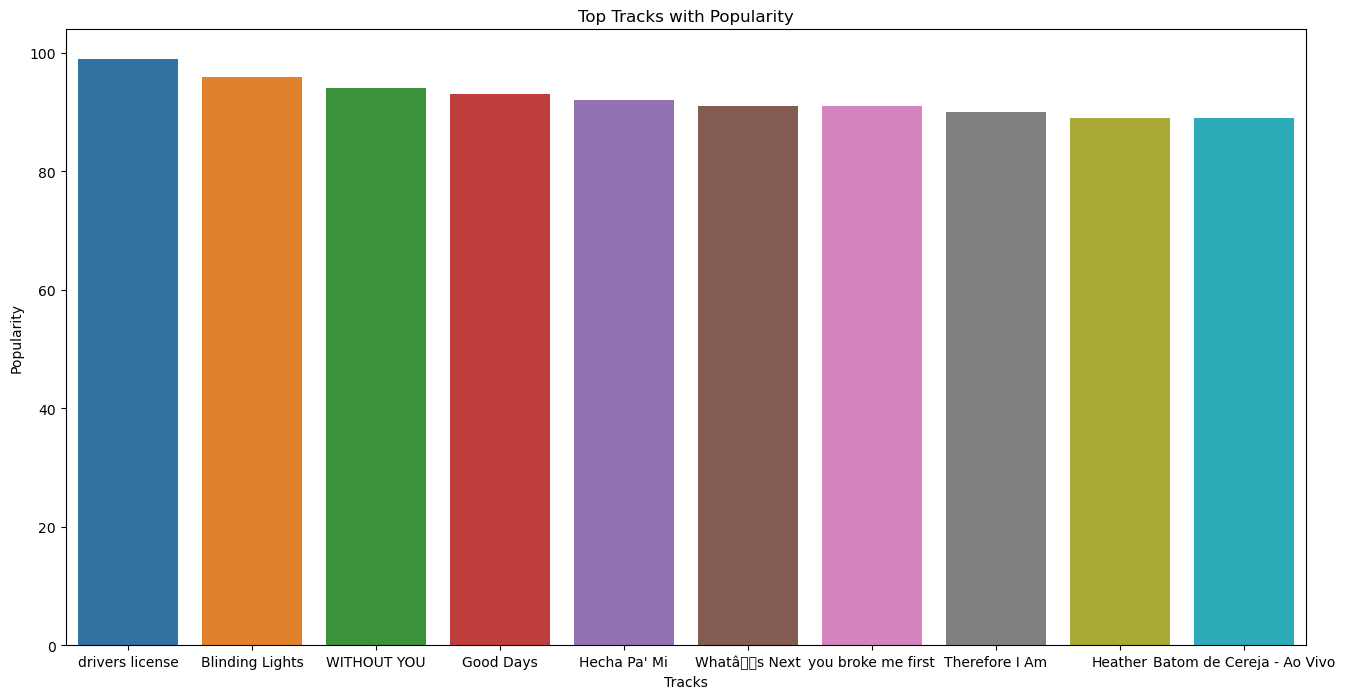

In [26]:
# top 10 tracks with popularity
plt.figure(figsize=(16, 8))
x = tracks_df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
sns.barplot(x.index,x)
plt.title('Top Tracks with Popularity')
plt.ylabel('Popularity')
plt.xlabel('Tracks')
# Drivers license is the most popular track with popularity of 99.

Text(0.5, 0, 'Artists')

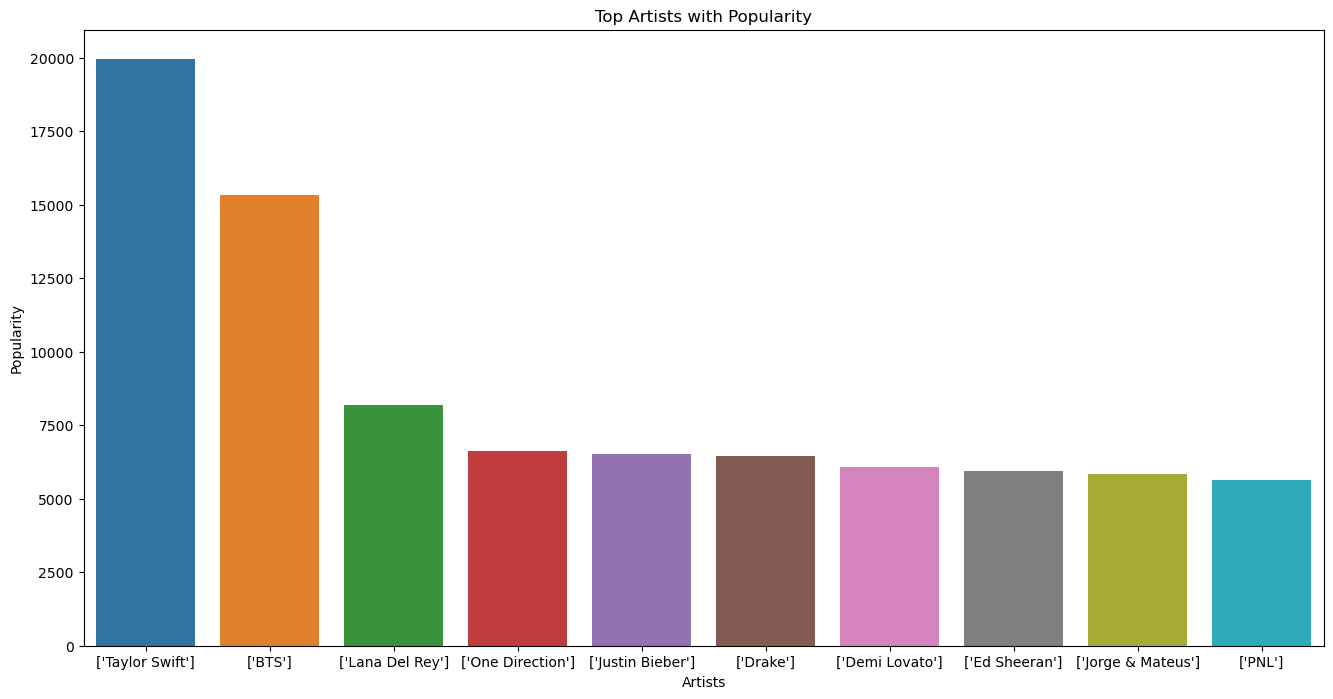

In [27]:
# top 10 artists with popularity
plt.figure(figsize=(16, 8))
x = tracks.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x.index, x)
plt.title('Top Artists with Popularity')
plt.ylabel('Popularity')
plt.xlabel('Artists')

Text(0.5, 0, 'Year')

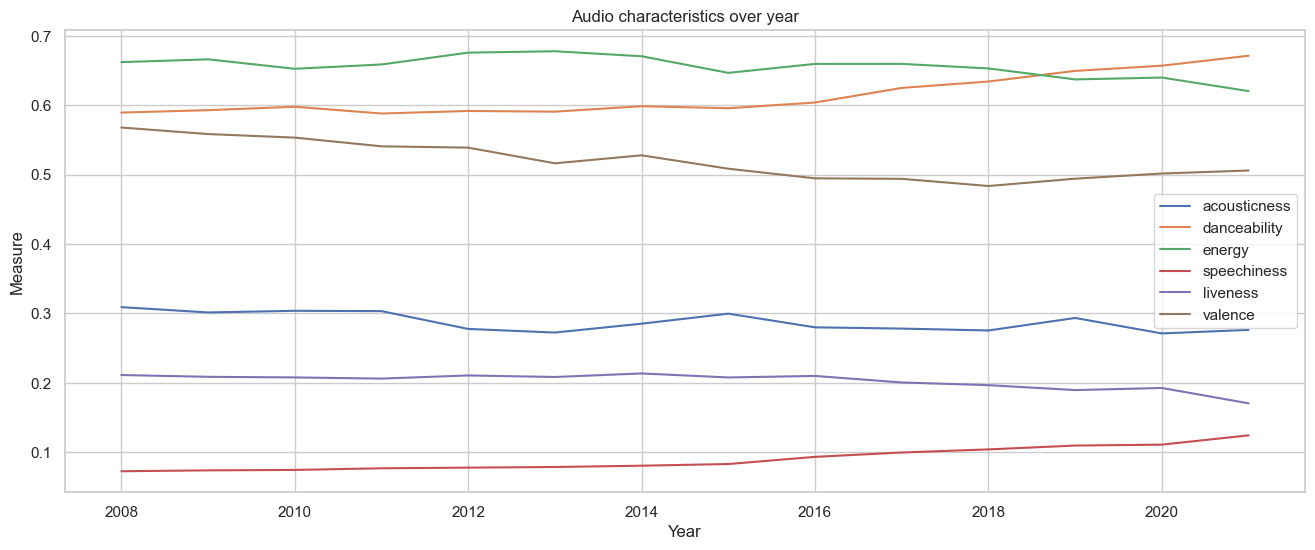

In [28]:
# Audio charecteristics over year
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = tracks.groupby("release_year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
#Tracks have become more Danceable in the recent years. The energy,acousticness has decreased

Text(0.5, 0, 'Year')

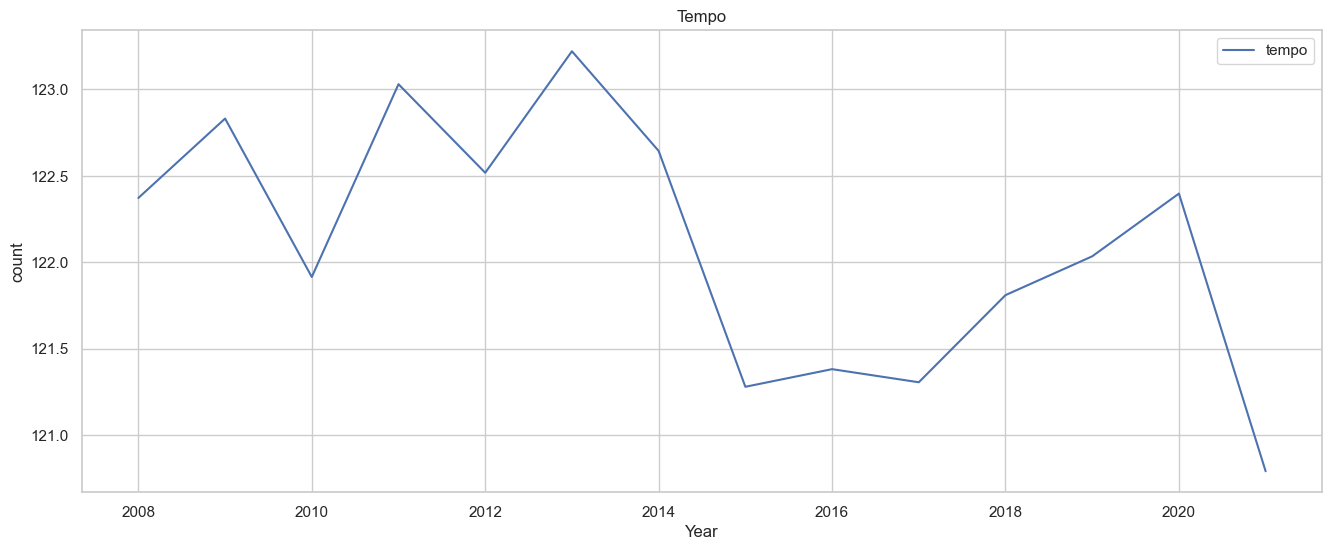

In [29]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
columns = ['tempo']
for col in columns:
    x = tracks.groupby('release_year')[col].mean()
sns.lineplot(x=x.index,y=x,label=col)
plt.title('Tempo')
plt.ylabel('count')
plt.xlabel('Year')
# Tempo of the songs has decreased

In [30]:
# Calculating correlation matrix
ContinuousCols=['popularity', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'followers','release_date','artists_popularity' ]

# Creating the correlation matrix
CorrelationData=tracks_df[ContinuousCols].corr()
CorrelationData

popularity  explicit  danceability    energy       key  \
popularity            1.000000  0.150017      0.119296 -0.070457 -0.005264   
explicit              0.150017  1.000000      0.176007  0.034774  0.004416   
danceability          0.119296  0.176007      1.000000  0.113467  0.014786   
energy               -0.070457  0.034774      0.113467  1.000000  0.031165   
key                  -0.005264  0.004416      0.014786  0.031165  1.000000   
loudness              0.108960  0.032236      0.169884  0.717594  0.023990   
mode                  0.000593 -0.066900     -0.078088 -0.088719 -0.132325   
speechiness           0.044204  0.391287      0.190556  0.122986  0.028428   
acousticness          0.052401 -0.070548     -0.122688 -0.684878 -0.020479   
instrumentalness     -0.288239 -0.075058     -0.131754 -0.031159 -0.002515   
liveness             -0.098858 -0.018085     -0.158037  0.173753 -0.000045   
valence               0.000040 -0.026680      0.459116  0.367705  0.024320   
tempo                -0.018959 -0.020083     -0.121616  0.178128  0.007517   
time_signature        0.005241  0.036698      0.151034  0.159640  0.008333   
followers             0.164017  0.055407      0.039162  0.012704 -0.010413   
artists_popularity    0.571956  0.150094      0.055279  0.008986 -0.007795   

                    loudness      mode  speechiness  acousticness  \
popularity          0.108960  0.000593     0.044204      0.052401   
explicit            0.032236 -0.066900     0.391287     -0.070548   
danceability        0.169884 -0.078088     0.190556     -0.122688   
energy              0.717594 -0.088719     0.122986     -0.684878   
key                 0.023990 -0.132325     0.028428     -0.020479   
loudness            1.000000 -0.043703     0.043953     -0.495996   
mode               -0.043703  1.000000    -0.093316      0.081788   
speechiness         0.043953 -0.093316     1.000000     -0.079311   
acousticness       -0.495996  0.081788    -0.079311      1.000000   
instrumentalness   -0.320737 -0.026996    -0.065251     -0.009175   
liveness            0.054963  0.009808     0.046653     -0.077861   
valence             0.295913 -0.025574     0.075997     -0.171769   
tempo               0.148209  0.010951     0.022750     -0.138743   
time_signature      0.138613 -0.028766     0.038735     -0.140107   
followers           0.082666  0.002133     0.015202     -0.055608   
artists_popularity  0.127404  0.000638     0.076647     -0.030911   

                    instrumentalness  liveness   valence     tempo  \
popularity                 -0.288239 -0.098858  0.000040 -0.018959   
explicit                   -0.075058 -0.018085 -0.026680 -0.020083   
danceability               -0.131754 -0.158037  0.459116 -0.121616   
energy                     -0.031159  0.173753  0.367705  0.178128   
key                        -0.002515 -0.000045  0.024320  0.007517   
loudness                   -0.320737  0.054963  0.295913  0.148209   
mode                       -0.026996  0.009808 -0.025574  0.010951   
speechiness                -0.065251  0.046653  0.075997  0.022750   
acousticness               -0.009175 -0.077861 -0.171769 -0.138743   
instrumentalness            1.000000  0.016380 -0.189481 -0.003414   
liveness                    0.016380  1.000000 -0.001868  0.010708   
valence                    -0.189481 -0.001868  1.000000  0.061644   
tempo                      -0.003414  0.010708  0.061644  1.000000   
time_signature             -0.049327 -0.001576  0.079182  0.013435   
followers                  -0.076810 -0.007870 -0.020572 -0.009811   
artists_popularity         -0.215175  0.005774 -0.028630 -0.020677   

                    time_signature  followers  artists_popularity  
popularity                0.005241   0.164017            0.571956  
explicit                  0.036698   0.055407            0.150094  
danceability              0.151034   0.039162            0.055279  
energy                    0.159640   0.012704           

In [31]:
corr = tracks_df.corr()

<AxesSubplot:>

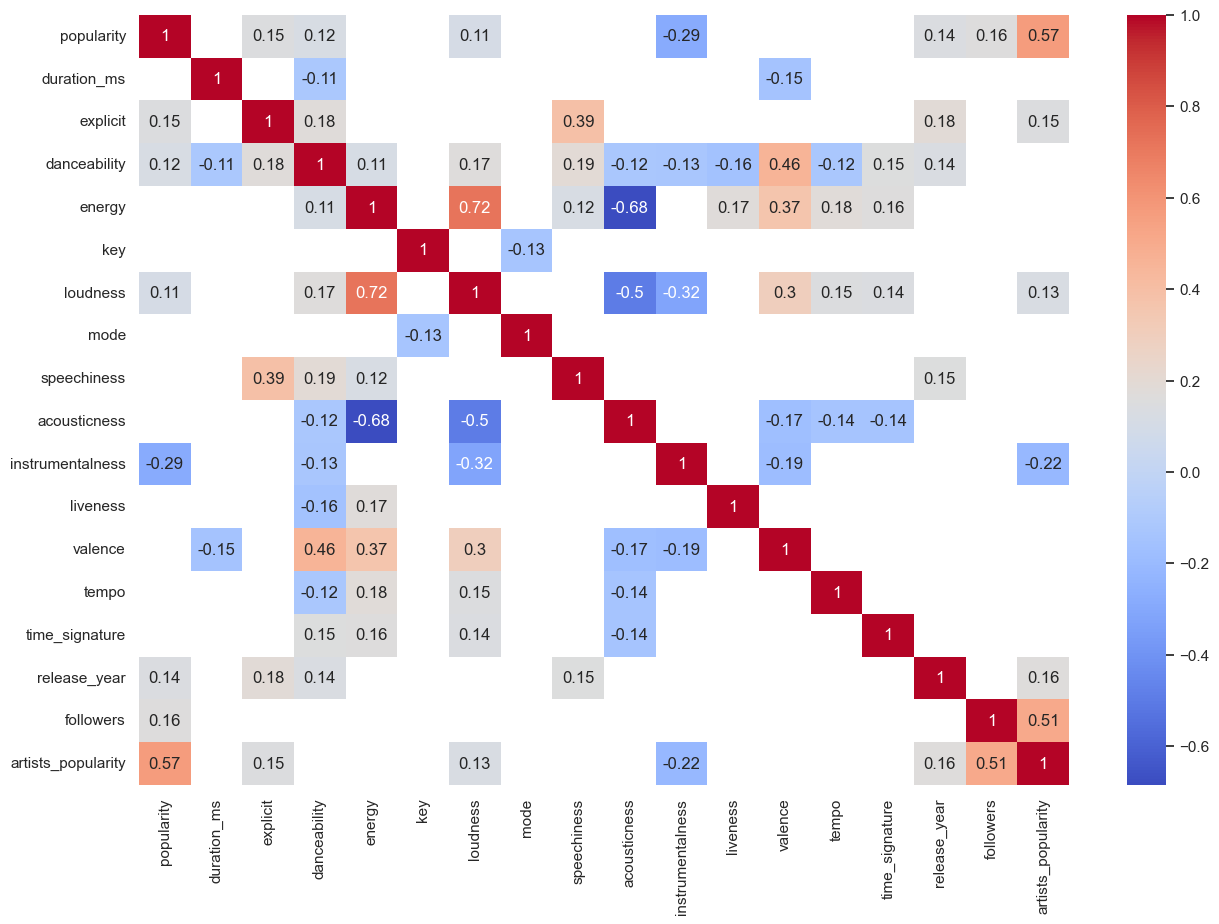

In [32]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')

In [33]:
#Sorting feature according to their importance
tracks_df.corr()['popularity'].sort_values(ascending=False)[1:]

artists_popularity    0.571956
followers             0.164017
explicit              0.150017
release_year          0.142030
danceability          0.119296
loudness              0.108960
acousticness          0.052401
speechiness           0.044204
time_signature        0.005241
mode                  0.000593
valence               0.000040
key                  -0.005264
tempo                -0.018959
duration_ms          -0.065920
energy               -0.070457
liveness             -0.098858
instrumentalness     -0.288239
Name: popularity, dtype: float64

The highest correlation is a positive one between "energy" and "loudness," which is not surprising.

It also makes perfect sense that "energy" and "acousticness" have a highly connected inverse correlation. A song tends to have less energy the more acoustic it leans toward being.

Unfortunately, we find relatively low correlations between our independent variables and our dependent variable, "popularity." The best we can get between "acousticness" and "popularity" is a -.37.

Our highest correlation coefficient, R, is squared to give us the necessary coefficient of determination (R2):
The target is low, but let's see how much we can surpass it.



In [34]:

tracks_df.drop(['id', 'id_artists', 'release_year'], axis=1, inplace=True)

Dropped unnecessary columns

Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship 
between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

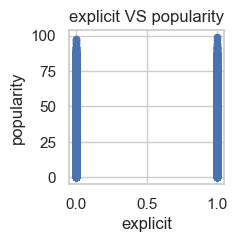

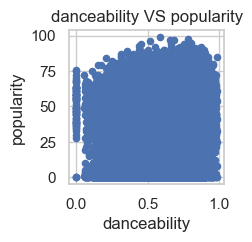

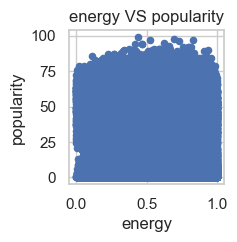

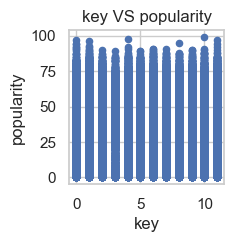

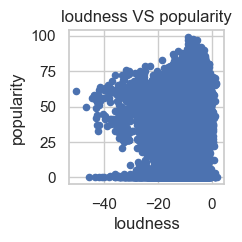

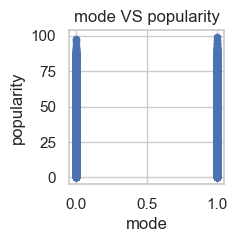

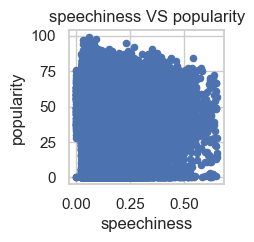

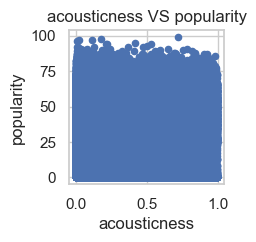

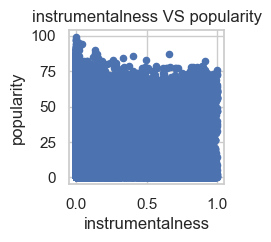

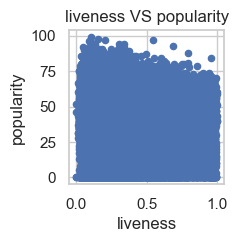

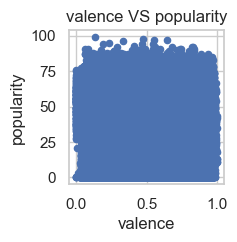

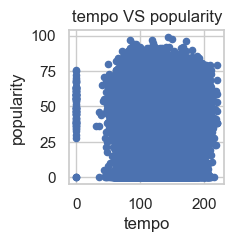

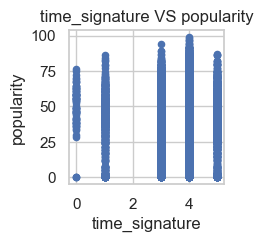

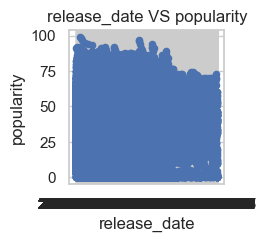

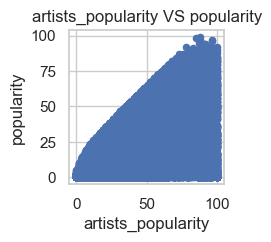

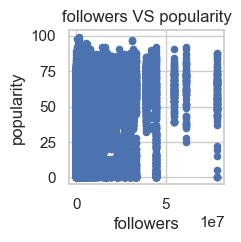

In [35]:
ContinuousCols=['explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature','release_date','artists_popularity', 'followers' ]

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    tracks_df.plot.scatter(x=predictor, y='popularity', figsize=(2,2), title=predictor+" VS "+ 'popularity')

Scatter charts interpretation
What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

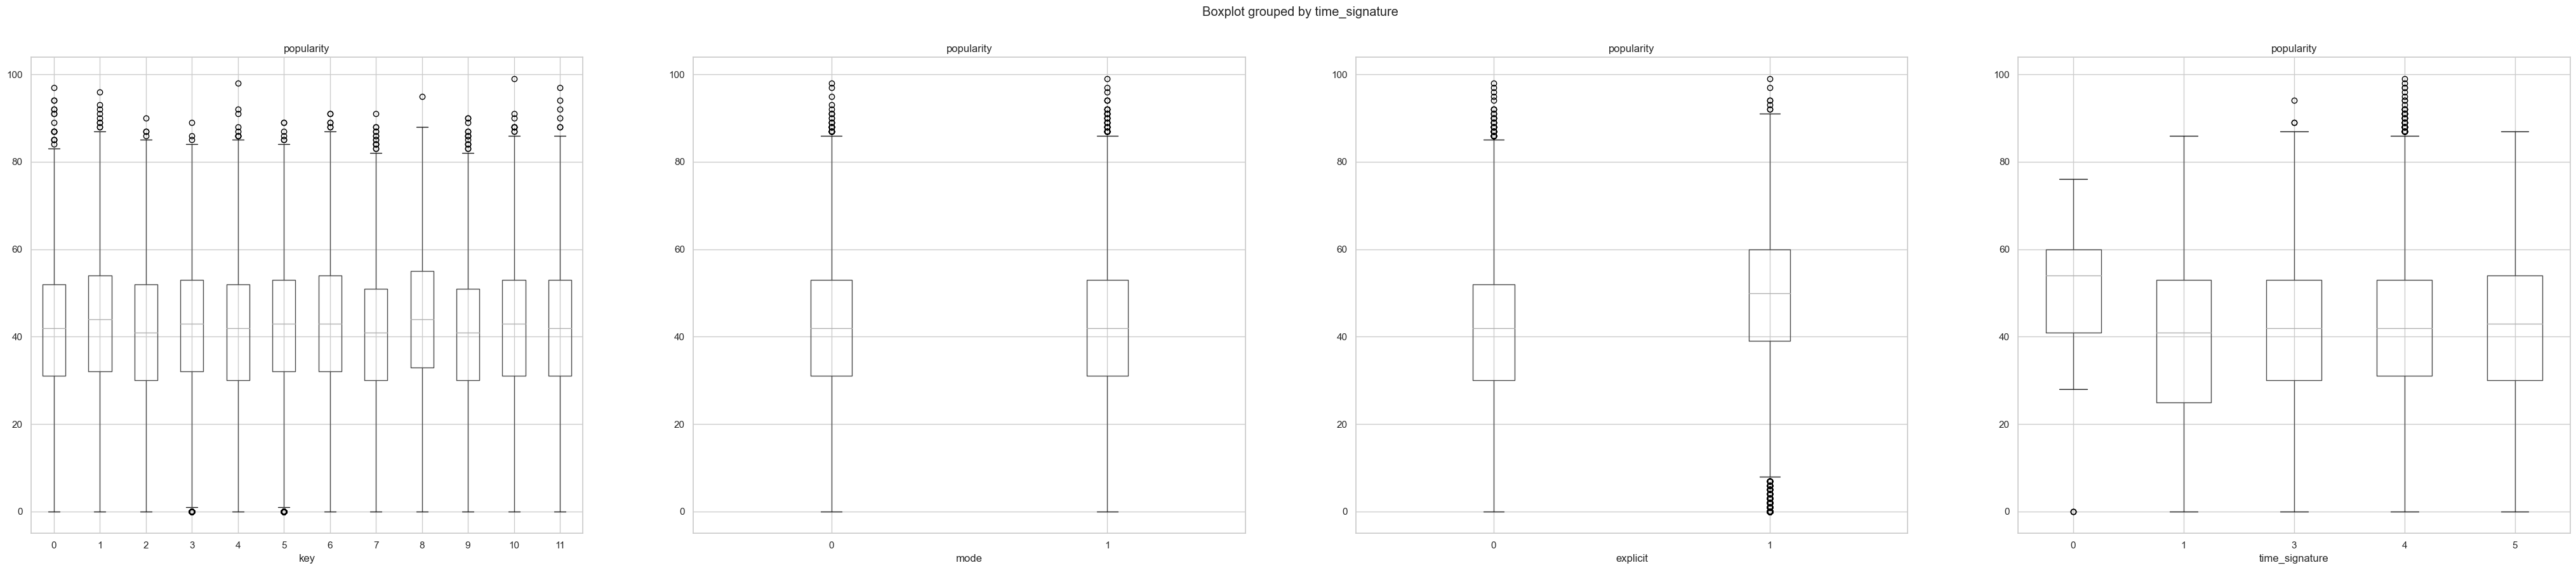

In [36]:
# Box plots for Categorical Target Variable "Popularity" and continuous predictors
CategoricalColsList=['key', 'mode', 'explicit', 
                                                 'time_signature']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Popularity"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    tracks_df.boxplot(column='popularity', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

We confirm this by looking at the results of ANOVA test below.

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
ANOVA Test result: Probability of H0 being true

In [37]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [38]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['key', 'mode', 'explicit', 
                                                 'time_signature']

FunctionAnova(inpData=tracks_df, 
              TargetVariable='popularity', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

key is correlated with popularity | P-Value: 1.6374991056745546e-47
mode is NOT correlated with popularity | P-Value: 0.8494952942120251
explicit is correlated with popularity | P-Value: 0.0
time_signature is correlated with popularity | P-Value: 3.595028127476172e-07


['key', 'explicit', 'time_signature']

# Feature Engineering
Label Encoding



Our dataset is a mix of both categorical and numeric data and since ML algorithms understand data of numeric nature let’s encode our categorical data into numeric ones using Label Encoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to n-1.

In [39]:
cols=tracks_df.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
tracks_df[cols]=tracks_df[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(tracks_df.head(10))

Index(['name', 'artists', 'release_date'], dtype='object')
    name  popularity  duration_ms  explicit  artists  release_date  \
0  71828          56       160187         0     8264            39   
1  21314          40       141987         0     8264            39   
2  16497          34       157093         0     8264            39   
3  27096          29       114987         0     8264            39   
4  25922          25       115240         0     8264            39   
5  16498          23       158800         0     8264            39   
6  21315          23       144200         0     8264            39   
7  27962          22       135867         0     8264            39   
8  28383          22       197560         0     8264            39   
9  62735          22       134173         0     8264            39   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.484   0.265    0   -11.101     1       0.0322         0.394   
1         0.405   0.

In [40]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(tracks_df.drop('popularity',axis=1),tracks_df['popularity'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(tracks_df.drop('popularity',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','popularity']
fscores.sort_values(by='popularity',ascending=False)

Attribute  popularity
18  artists_popularity  637.697987
12    instrumentalness  183.636479
4         release_date  152.217948
17           followers  115.056867
2             explicit   35.440041
8             loudness   23.397634
0                 name   21.614388
5         danceability   19.773068
13            liveness   18.711254
6               energy   13.842816
14             valence   12.844446
11        acousticness   11.972913
1          duration_ms   11.371865
10         speechiness    5.381810
3              artists    2.476588
16      time_signature    1.888188
15               tempo    1.593293
9                 mode    1.485089
7                  key    0.993720

In the above result, we can see that artist_popularity is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 20. Resulting in the same features we got in the heatmap.

# Splitting data
Now, let’s split features into training and testing sets for training and testing our classification models.

In [41]:
features = ['explicit', 'danceability', 'energy', 'name','acousticness',
        'loudness',
       'instrumentalness', 'liveness', 'valence','release_date','artists_popularity', 'followers']

In [42]:
final_features=tracks_df[['explicit', 'danceability', 'energy', 'name','acousticness',
        'loudness',
       'instrumentalness', 'liveness', 'valence','release_date','artists_popularity', 'followers']]
target = tracks_df['popularity']

In [43]:
#Scaling the features using MinMax Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [44]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(81946, 12) (81946,) (20487, 12) (20487,)


# Model Creation
Let’s start with creating models. We are first fitting regression models to see how they perform

we now convert out target variable into a categoricall variable having 0's and 1's by seggregating the popularity into two levels. 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,cohen_kappa_score
from warnings import filterwarnings
filterwarnings('ignore')


In [46]:
numeric_columns = tracks_df.columns[tracks_df.dtypes != 'object']
numeric_df = pd.DataFrame(data=tracks_df, columns=numeric_columns, index=tracks_df.index)

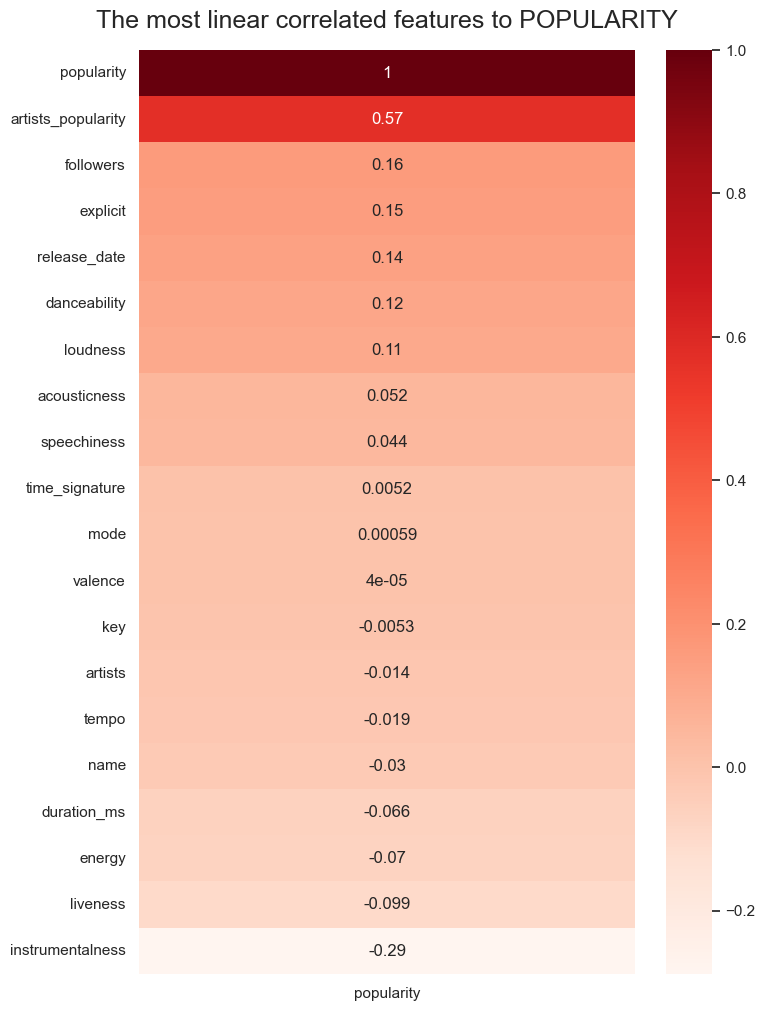

In [47]:
corr = numeric_df.corr()[['popularity']].sort_values(by='popularity', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr, annot=True, cmap='Reds')
heatmap.set_title('The most linear correlated features to POPULARITY', fontdict={'fontsize':18}, pad=16);

In [48]:
tracks_df.drop(['artists_popularity'],axis=1)

name  popularity  duration_ms  explicit  artists  release_date  \
0       71828          56       160187         0     8264            39   
1       21314          40       141987         0     8264            39   
2       16497          34       157093         0     8264            39   
3       27096          29       114987         0     8264            39   
4       25922          25       115240         0     8264            39   
...       ...         ...          ...       ...      ...           ...   
102428  80962          50       265846         0    25726          4288   
102429  62656          67        82500         0    12721          4536   
102430  31134          66       185250         0     8589          4312   
102431  81102          50       258267         0    25773          4502   
102432  72585          72       153293         0    18292          4527   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.484  0.2650    0   -11.101     1       0.0322         0.394   
1              0.405  0.3650    6   -10.226     0       0.0289         0.255   
2              0.477  0.3520    1   -14.165     1       0.0300         0.406   
3              0.617  0.7110    9    -6.433     1       0.0297         0.360   
4              0.409  0.6390    6    -7.628     1       0.0302         0.288   
...              ...     ...  ...       ...   ...          ...           ...   
102428         0.528  0.6730    4    -3.639     1       0.0314         0.143   
102429         0.609  0.0172    8   -28.573     1       0.1180         0.996   
102430         0.562  0.0331    1   -25.551     1       0.1030         0.996   
102431         0.560  0.5180    0    -7.471     0       0.0292         0.785   
102432         0.765  0.6630    0    -5.223     1       0.0652         0.141   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000000    0.1490    0.285  113.564               3   
1               0.000005    0.1630    0.588  104.536               4   
2               0.000000    0.1220    0.478  106.773               4   
3               0.000002    0.0841    0.963  142.266               4   
4               0.000000    0.3430    0.928  145.903               4   
...                  ...       ...      ...      ...             ...   
102428          0.000000    0.0989    0.297  130.066               4   
102429          0.973000    0.1080    0.890   68.619               4   
102430          0.961000    0.1110    0.386   63.696               3   
102431          0.000000    0.0648    0.211  131.896               4   
102432          0.000297    0.0924    0.686  150.091               4   

        followers  
0        175360.0  
1        175360.0  
2        175360.0  
3        175360.0  
4        175360.0  
...           ...  
102428      929.0  
102429       23.0  
102430       91.0  
102431      896.0  
102432   245944.0  

[102433 rows x 19 columns]

In [49]:
tracks_df['mode'] = tracks_df['mode'].astype('object')
tracks_df['key'] = tracks_df['key'].astype('object')
tracks_df['explicit'] = tracks_df['explicit'].astype('object')

In [50]:
df_num = tracks_df.select_dtypes(include = np.number)
df_num.columns

Index(['name', 'popularity', 'duration_ms', 'artists', 'release_date',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'followers', 'artists_popularity'],
      dtype='object')

creating a copy of the dataset and creating a new column "populartity_level" to increase our model accuracy we have converted our targeted variable from numerical to categorical using separate variable popularity_level- What we have done is popularity >= 0 and popularity <= 60 as 0 popularity > 60 and popularity <= 100 as 1

In [51]:
df1 = tracks_df.copy()

df1.loc[((tracks_df.popularity >= 0) & (tracks_df.popularity <= 60)), "popularity_level" ] = 0
df1.loc[((tracks_df.popularity > 60) & (tracks_df.popularity <= 100)), "popularity_level" ] = 1

df1["popularity_level"] = df1["popularity_level"].astype("int")




df1.head(10)

name  popularity  duration_ms explicit  artists  release_date  \
0  71828          56       160187        0     8264            39   
1  21314          40       141987        0     8264            39   
2  16497          34       157093        0     8264            39   
3  27096          29       114987        0     8264            39   
4  25922          25       115240        0     8264            39   
5  16498          23       158800        0     8264            39   
6  21315          23       144200        0     8264            39   
7  27962          22       135867        0     8264            39   
8  28383          22       197560        0     8264            39   
9  62735          22       134173        0     8264            39   

   danceability  energy key  loudness  ... speechiness  acousticness  \
0         0.484   0.265   0   -11.101  ...      0.0322         0.394   
1         0.405   0.365   6   -10.226  ...      0.0289         0.255   
2         0.477   0.352   1   -14.165  ...      0.0300         0.406   
3         0.617   0.711   9    -6.433  ...      0.0297         0.360   
4         0.409   0.639   6    -7.628  ...      0.0302         0.288   
5         0.459   0.344   1   -12.205  ...      0.0301         0.764   
6         0.399   0.296   6   -12.364  ...      0.0294         0.500   
7         0.550   0.552   7   -10.334  ...      0.0344         0.330   
8         0.609   0.290   7   -11.226  ...      0.0342         0.696   
9         0.600   0.374   2   -14.046  ...      0.0264         0.773   

   instrumentalness  liveness  valence    tempo  time_signature  followers  \
0          0.000000    0.1490    0.285  113.564               3   175360.0   
1          0.000005    0.1630    0.588  104.536               4   175360.0   
2          0.000000    0.1220    0.478  106.773               4   175360.0   
3          0.000002    0.0841    0.963  142.266               4   175360.0   
4          0.000000    0.3430    0.928  145.903               4   175360.0   
5          0.000594    0.1110    0.487  106.479               4   175360.0   
6          0.000000    0.0719    0.658  107.098               4   175360.0   
7          0.000000    0.0907    0.964  147.715               4   175360.0   
8          0.000027    0.1080    0.487  122.434               4   175360.0   
9          0.000169    0.1120    0.556   95.023               3   175360.0   

   artists_popularity  popularity_level  
0                  55                 0  
1                  55                 0  
2                  55                 0  
3                  55                 0  
4                  55                 0  
5                  55                 0  
6                  55                 0  
7                  55                 0  
8                  55                 0  
9                  55                 0  

[10 rows x 21 columns]

In [52]:
# #creating dummies for categorical columns
df1 = pd.get_dummies(data = df1,columns = ['key','mode','explicit'],drop_first = True)

In [53]:
df1.columns

Index(['name', 'popularity', 'duration_ms', 'artists', 'release_date',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'followers', 'artists_popularity', 'popularity_level', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_1', 'explicit_1'],
      dtype='object')

In [54]:
artists = ['Drake', 'Lady Gaga', 'Taylor Swift', 'The Weeknd']

# Create a list of indices corresponding to the artists above
# The first comprehension creates a list of lists, the second flattens it into one
to_drop = [df1[df1.artists == name].index.tolist() for name in artists]
to_drop = [ind for sub in to_drop for ind in sub]

# Gather the test cases
df_x = df1.copy()
cases = df_x[df_x.index.isin(to_drop)]

# Remove the test cases from df1
df1.drop(to_drop, inplace=True)

## Drop unnecessary columns 
df1 = df1.drop(['popularity',"name", "artists"], axis=1)

df1.head()

duration_ms  release_date  danceability  energy  loudness  speechiness  \
0       160187            39         0.484   0.265   -11.101       0.0322   
1       141987            39         0.405   0.365   -10.226       0.0289   
2       157093            39         0.477   0.352   -14.165       0.0300   
3       114987            39         0.617   0.711    -6.433       0.0297   
4       115240            39         0.409   0.639    -7.628       0.0302   

   acousticness  instrumentalness  liveness  valence  ...  key_4  key_5  \
0         0.394          0.000000    0.1490    0.285  ...      0      0   
1         0.255          0.000005    0.1630    0.588  ...      0      0   
2         0.406          0.000000    0.1220    0.478  ...      0      0   
3         0.360          0.000002    0.0841    0.963  ...      0      0   
4         0.288          0.000000    0.3430    0.928  ...      0      0   

   key_6  key_7  key_8  key_9  key_10  key_11  mode_1  explicit_1  
0      0      0      0      0       0       0       1           0  
1      1      0      0      0       0       0       0           0  
2      0      0      0      0       0       0       1           0  
3      0      0      0      1       0       0       1           0  
4      1      0      0      0       0       0       1           0  

[5 rows x 28 columns]

In [55]:
df1.columns

Index(['duration_ms', 'release_date', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'followers', 'artists_popularity',
       'popularity_level', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1',
       'explicit_1'],
      dtype='object')

In [56]:
#doing train and test again with the new column as our target variable
y = df1['popularity_level']
X = final_features
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.30,random_state = 123,stratify = y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((71703, 12), (30730, 12), (71703,), (30730,))

In [57]:
def plot_metrics(xtest,ytest,model):
    ypred = model.predict(xtest)
    print('Classification Report ')
    print(classification_report(ytest,ypred))
    print('    Confusion Matrix    ')
    cm = confusion_matrix(ytest, ypred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted : 0','Predicted : 1'],index = ['Actual : 0','Actual : 1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    print('ROC CURVE')
    fpr, tpr, thresholds = roc_curve(ytest, ypred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for SPOTIFY POPULARITY PREDICTION', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
    plt.grid(True)
    plt.show()
    print()
    print('Cohen Kappa Score is ',cohen_kappa_score(ytest,ypred))

# Logistic Regression

In [58]:
LR = LogisticRegression()

In [59]:
logreg = LR.fit(xtrain,ytrain)

In [60]:
ypred_prob = logreg.predict(xtest)
ypred = [0 if i< 0.5 else 1 for i in ypred_prob]
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     27236
           1       0.39      0.06      0.10      3494

    accuracy                           0.88     30730
   macro avg       0.64      0.52      0.52     30730
weighted avg       0.83      0.88      0.84     30730



In [61]:
print(confusion_matrix(ytest,ypred))

[[26919   317]
 [ 3292   202]]


<AxesSubplot:>

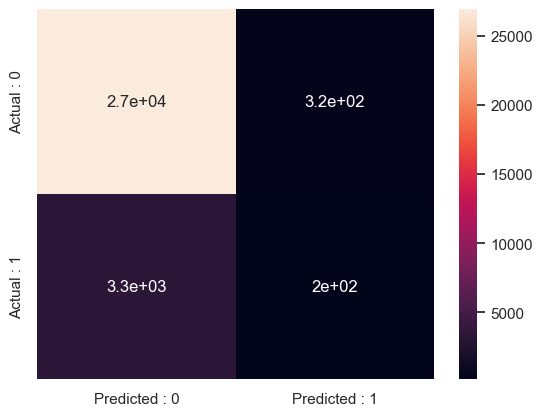

In [62]:
cm = confusion_matrix(ytest,ypred)
conf_mat = pd.DataFrame(cm,columns = ['Predicted : 0','Predicted : 1'],index = ['Actual : 0','Actual : 1'])
sns.heatmap(conf_mat,annot = True)

In [63]:
score_card = pd.DataFrame(columns = ['Model name','Accuracy','F1-Score','Cohen-Kappa'])
score_card

Empty DataFrame
Columns: [Model name, Accuracy, F1-Score, Cohen-Kappa]
Index: []

In [64]:
s = pd.Series({'Model name': 'Logistic Regression - Base Model','Accuracy': np.round(accuracy_score(ytest,ypred),2),'F1-Score': np.round(f1_score(ytest,ypred),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88       0.1         0.07

# Decision Tree

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27236
           1       0.44      0.46      0.45      3494

    accuracy                           0.87     30730
   macro avg       0.69      0.69      0.69     30730
weighted avg       0.88      0.87      0.87     30730

    Confusion Matrix    


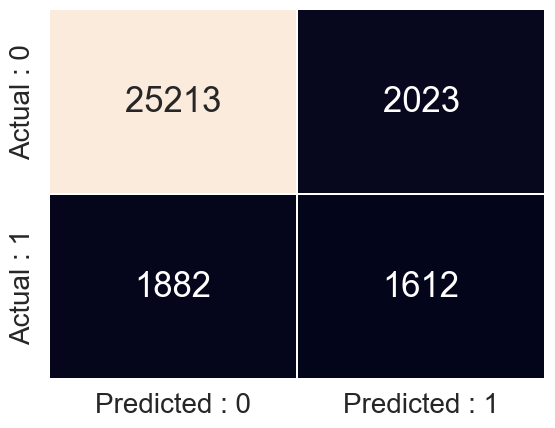

ROC CURVE


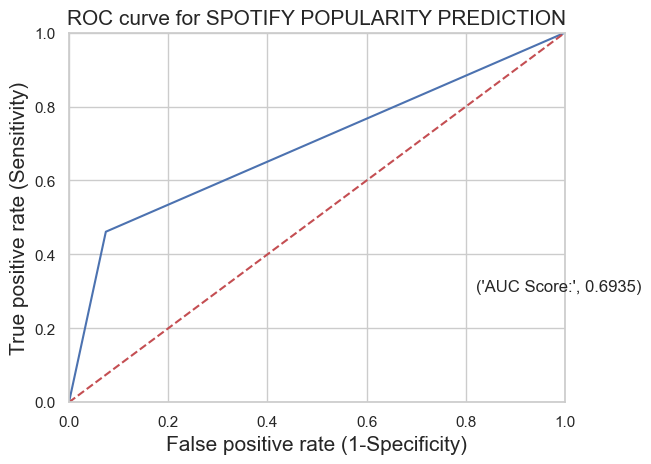


Cohen Kappa Score is  0.3803948918172759


In [65]:
DC = DecisionTreeClassifier(random_state = 10)
DC_mod = DC.fit(xtrain,ytrain)
plot_metrics(xtest,ytest,DC_mod)

In [66]:
ypred_dc = DC_mod.predict(xtest)

In [67]:
s = pd.Series({'Model name': 'Decision Tree without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_dc),2),'F1-Score': np.round(f1_score(ytest,ypred_dc),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_dc),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88      0.10         0.07
1     Decision Tree without tuning       0.87      0.45         0.38

In [68]:
#the accuracy we got from Decision tree is 87.0

# Random Forest

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     27236
           1       0.67      0.39      0.49      3494

    accuracy                           0.91     30730
   macro avg       0.80      0.68      0.72     30730
weighted avg       0.90      0.91      0.90     30730

    Confusion Matrix    


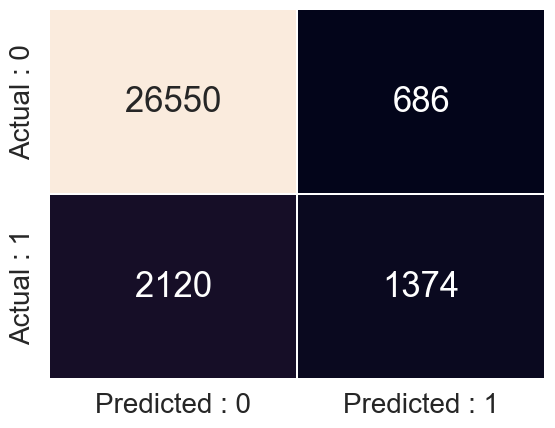

ROC CURVE


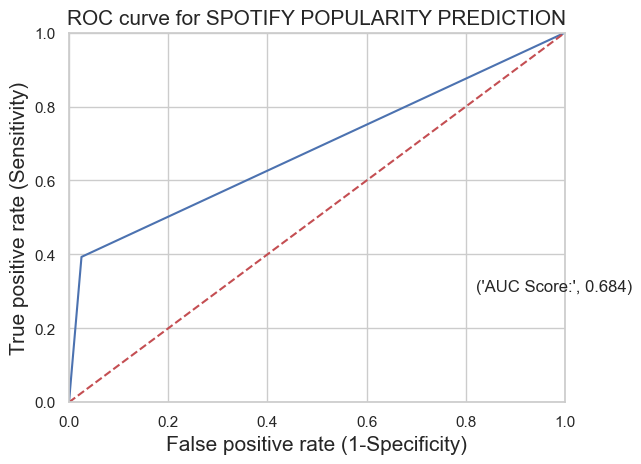


Cohen Kappa Score is  0.4482412687963345


In [69]:
RF = RandomForestClassifier()
RF_mod = RF.fit(xtrain,ytrain)
plot_metrics(xtest,ytest,RF_mod)

In [70]:
ypred_rf = RF_mod.predict(xtest)
s = pd.Series({'Model name': 'Random Forest  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_rf),2),'F1-Score': np.round(f1_score(ytest,ypred_rf),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_rf),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88      0.10         0.07
1     Decision Tree without tuning       0.87      0.45         0.38
2    Random Forest  without tuning       0.91      0.49         0.45

In [71]:
#Our accuracy stands at 91.0 by performing Random Forest

# AdaBoost

Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27236
           1       0.65      0.32      0.42      3494

    accuracy                           0.90     30730
   macro avg       0.78      0.65      0.69     30730
weighted avg       0.89      0.90      0.89     30730

    Confusion Matrix    


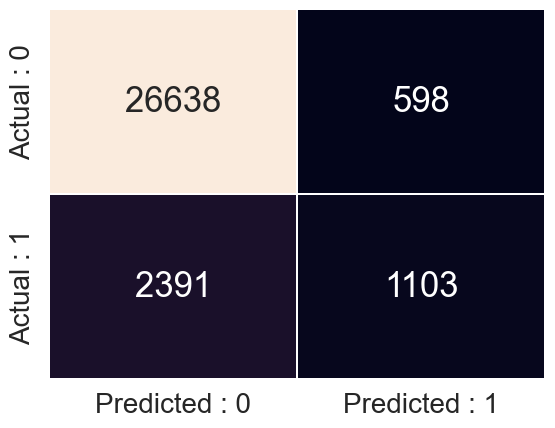

ROC CURVE


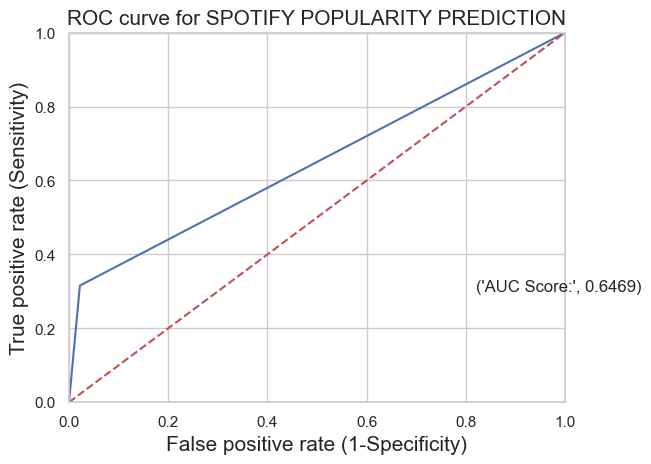


Cohen Kappa Score is  0.37835270342959615


In [72]:
AD = AdaBoostClassifier()
AD_mod = AD.fit(xtrain,ytrain)
plot_metrics(xtest,ytest,AD_mod)

In [73]:
ypred_ad = AD_mod.predict(xtest)
s = pd.Series({'Model name': 'ADA Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_ad),2),'F1-Score': np.round(f1_score(ytest,ypred_ad),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_ad),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88      0.10         0.07
1     Decision Tree without tuning       0.87      0.45         0.38
2    Random Forest  without tuning       0.91      0.49         0.45
3        ADA Boost  without tuning       0.90      0.42         0.38

Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27236
           1       0.68      0.36      0.47      3494

    accuracy                           0.91     30730
   macro avg       0.80      0.67      0.71     30730
weighted avg       0.89      0.91      0.89     30730

    Confusion Matrix    


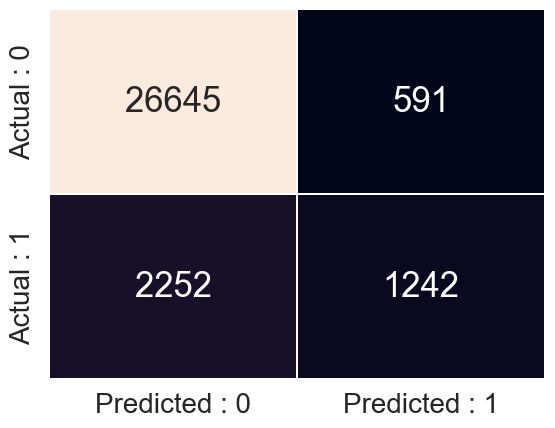

ROC CURVE


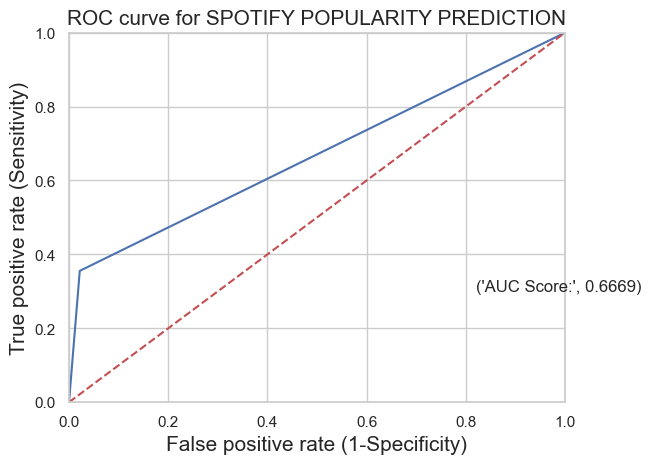


Cohen Kappa Score is  0.4209983416628832


In [74]:
GB = GradientBoostingClassifier()
GB_mod = GB.fit(xtrain,ytrain)
plot_metrics(xtest,ytest,GB_mod)


In [75]:
ypred_gb = GB_mod.predict(xtest)
s = pd.Series({'Model name': 'Gradient  Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_gb),2),'F1-Score': np.round(f1_score(ytest,ypred_gb),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_gb),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88      0.10         0.07
1     Decision Tree without tuning       0.87      0.45         0.38
2    Random Forest  without tuning       0.91      0.49         0.45
3        ADA Boost  without tuning       0.90      0.42         0.38
4  Gradient  Boost  without tuning       0.91      0.47         0.42

# XGboost

In [76]:
import sys
!{sys.executable} -m pip install xgboost

Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     27236
           1       0.69      0.39      0.49      3494

    accuracy                           0.91     30730
   macro avg       0.81      0.68      0.72     30730
weighted avg       0.90      0.91      0.90     30730

    Confusion Matrix    


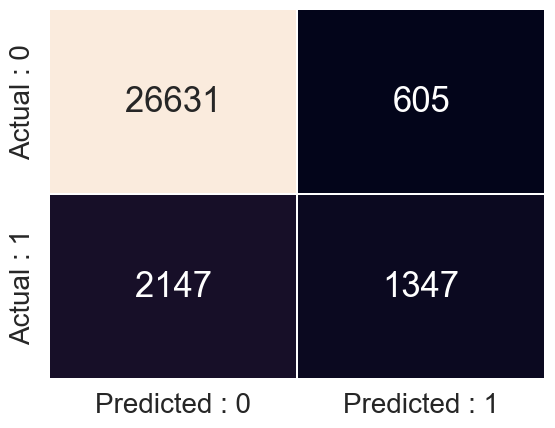

ROC CURVE


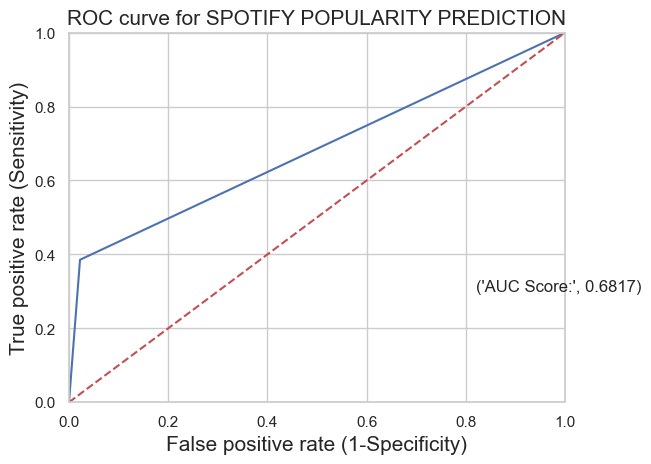


Cohen Kappa Score is  0.4498327567294601


In [77]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
XG_mod = xgb_cl.fit(xtrain,ytrain)
plot_metrics(xtest,ytest,XG_mod)


In [78]:
ypred_xg = XG_mod.predict(xtest)
s = pd.Series({'Model name': 'XG Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_xg),2),'F1-Score': np.round(f1_score(ytest,ypred_xg),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_xg),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88      0.10         0.07
1     Decision Tree without tuning       0.87      0.45         0.38
2    Random Forest  without tuning       0.91      0.49         0.45
3        ADA Boost  without tuning       0.90      0.42         0.38
4  Gradient  Boost  without tuning       0.91      0.47         0.42
5         XG Boost  without tuning       0.91      0.49         0.45

In [79]:
df1['popularity_level'].value_counts()

0    90788
1    11645
Name: popularity_level, dtype: int64

# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=10)

Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27236
           1       0.63      0.17      0.27      3494

    accuracy                           0.89     30730
   macro avg       0.77      0.58      0.61     30730
weighted avg       0.87      0.89      0.87     30730

    Confusion Matrix    


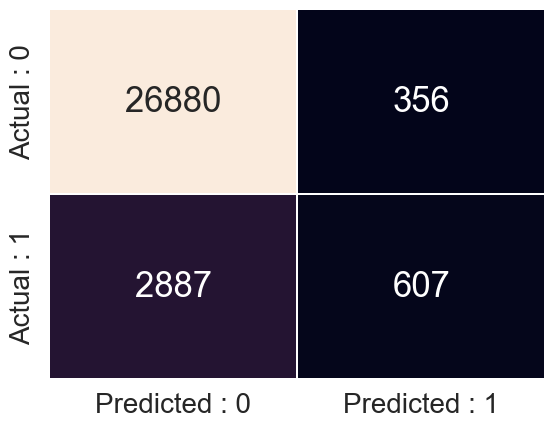

ROC CURVE


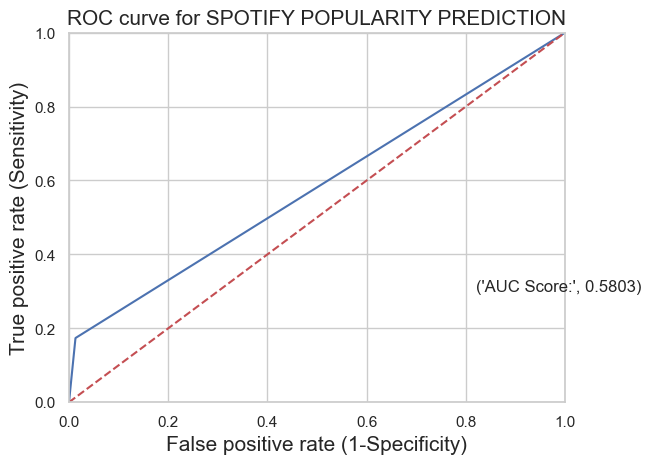


Cohen Kappa Score is  0.23478305992300053


In [82]:
knn_mod = knn.fit(xtrain,ytrain)
plot_metrics(xtest,ytest,knn_mod)


In [83]:
ypred_knn = knn_mod.predict(xtest)
s = pd.Series({'Model name': 'KNN','Accuracy': np.round(accuracy_score(ytest,ypred_knn),2),'F1-Score': np.round(f1_score(ytest,ypred_knn),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_knn),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.88      0.10         0.07
1     Decision Tree without tuning       0.87      0.45         0.38
2    Random Forest  without tuning       0.91      0.49         0.45
3        ADA Boost  without tuning       0.90      0.42         0.38
4  Gradient  Boost  without tuning       0.91      0.47         0.42
5         XG Boost  without tuning       0.91      0.49         0.45
6                               KNN      0.89      0.27         0.23

In [84]:
#KNN which is our classification model gave us an accuracy of 89 which is decent